<a href="https://colab.research.google.com/github/PurnamaRidzkyN/Total-net-salles-predictionlearn-ML-/blob/main/Total_net_salles_predictionlearn_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'retail-business-sales-20172019:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F563799%2F1024240%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240629%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240629T072258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da080e15151fc4a3061eee396bcb38fe2f009279064e7a5ee2d198c0fa0e6e2baa3c17e79078314269d0340f2574a284a03a6a37e0e421da8212b7ba60fdd1dcc4d90abbbefc9dae7777c81c2a41990acc0bdd85de81ca20e852133c863213206392e8ac9d3ce26fa4ee1f09da52a907ace424a2f4936ec1414a25963b9609fe0c31d667b041b4969474cc860bf7ad33e8cf0ec809f5360b781f95073cb8eaaeb7ce102b1bef812340341eb5a1a6e3495e3a3faf93ce775306a68eff0b69f5df42ed8f111f1dc5c20508fa7c52f3eb9d4d11a96615a7da6e405e64c8031d204a5860e0af44116ca80c3df25f1f2527ab971b94c9f2ce7a8ccc9d18c63ac927165'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-business-sales-20172019/business.retailsales2.csv
/kaggle/input/retail-business-sales-20172019/business.retailsales.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = "/kaggle/input/retail-business-sales-20172019/business.retailsales.csv"
df = pd.read_csv(data)
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


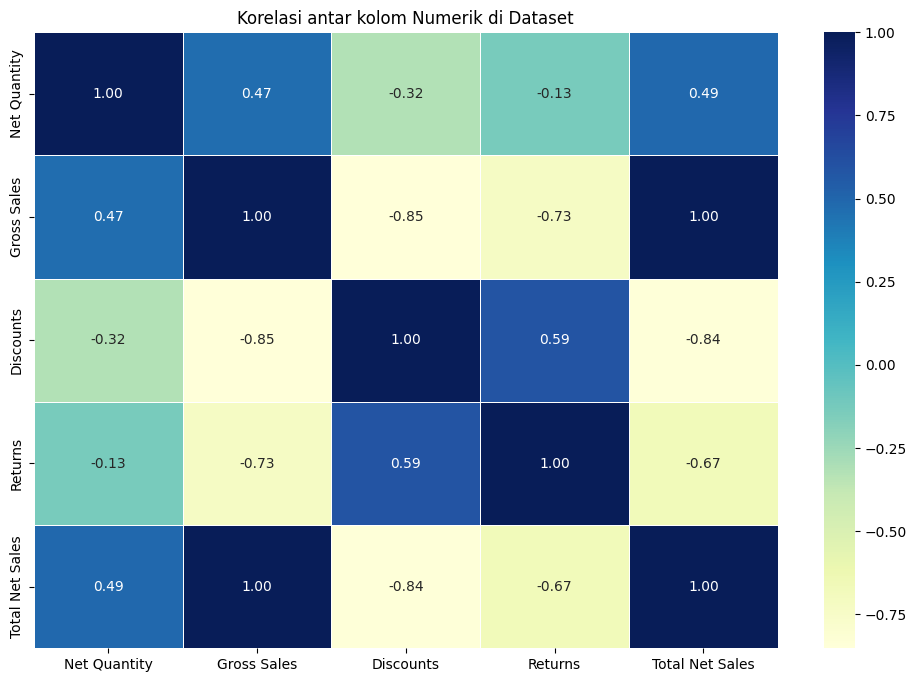

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

#hitung korelasi
correlation_matrix= numeric_columns.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="YlGnBu",annot=True,fmt=".2f", linewidths=.5)
plt.title("Korelasi antar kolom Numerik di Dataset")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


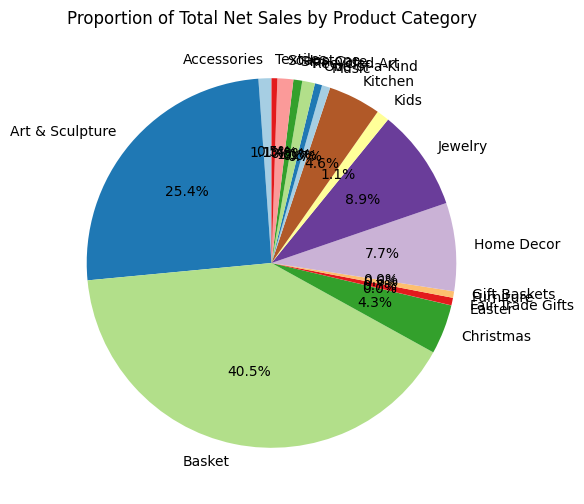

In [ ]:
# Menjumlahkan penjualan untuk setiap kategori produk
sales_by_category = df.groupby('Product Type')['Total Net Sales'].sum()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Net Sales by Product Category')
plt.show()

In [ ]:
sorted_df = df.groupby('Product Type')['Total Net Sales'].sum().sort_values(ascending=False).reset_index()

# 2. Pilih sejumlah kategori produk yang ingin Anda pertahankan (misalnya, 5 kategori teratas)
top_categories = sorted_df['Product Type'].head(5).tolist()

# 3. Buat DataFrame baru yang hanya berisi data untuk kategori-kategori teratas
df_bisnis_1 = df[df['Product Type'].isin(top_categories)].copy()
# Menjumlahkan penjualan untuk setiap kategori produk
df_bisnis_1

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


Text(0, 0.5, 'Net Quantity')

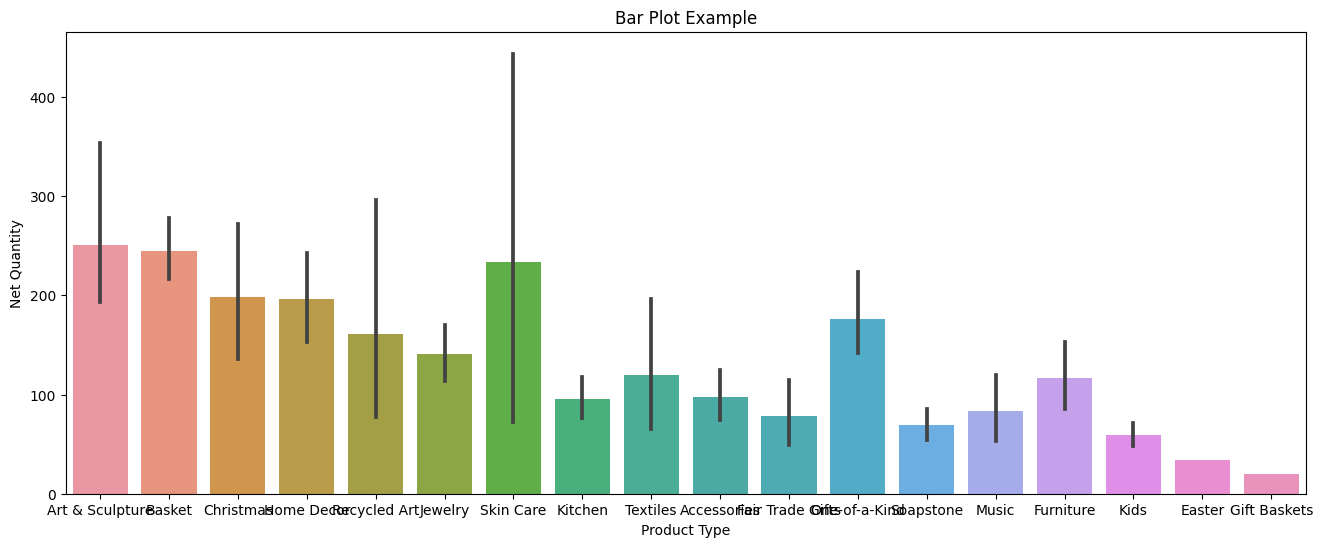

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Product Type'], y=df['Total Net Sales'])

# Adding title and axis labels
plt.title('Bar Plot Example')
plt.xlabel('Product Type')
plt.ylabel('Total Net Sales')

In [ ]:
# Menghitung total keuntungan untuk setiap kategori produk
total_profit_by_category = df.groupby('Product Type')['Total Net Sales'].sum()

# Menentukan kategori dengan total keuntungan terbanyak
most_profitable_category = total_profit_by_category.idxmax()

# Menampilkan kategori dengan total keuntungan terbanyak
print(f"The most profitable category is: {most_profitable_category}")


The most profitable category is: Basket


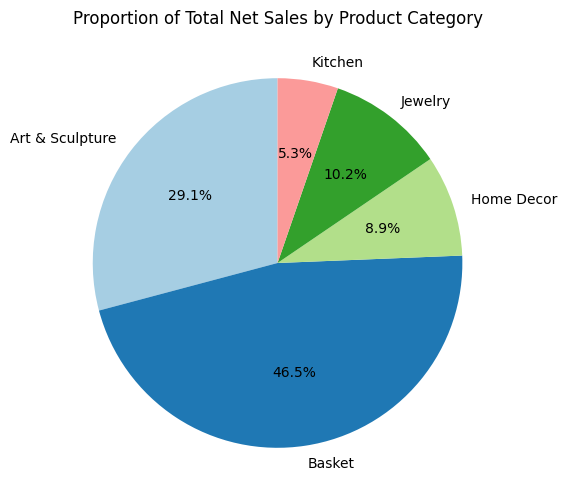

In [ ]:
sales_by_category = df_bisnis_1.groupby('Product Type')['Total Net Sales'].sum()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Net Sales by Product Category')
plt.show()

In [ ]:

# Mendapatkan kolom biner untuk setiap kategori
dummies = pd.get_dummies(df_bisnis_1['Product Type'])

# Mengganti nilai True/False menjadi 1/0
df_bisnis_1[dummies.columns] = dummies.apply(lambda x: x.astype(int))

# Menghapus kolom "Product Type"
df_bisnis_1.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Art & Sculpture,Basket,Home Decor,Jewelry,Kitchen
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00,1,0,0,0,0
1,Basket,13,3744.0,-316.80,0.0,3427.20,0,1,0,0,0
2,Basket,12,3825.0,-201.60,-288.0,3335.40,0,1,0,0,0
3,Basket,17,3035.0,-63.25,0.0,2971.75,0,1,0,0,0
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64,1,0,0,0,0


In [ ]:
df_bisnis_1.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Art & Sculpture,Basket,Home Decor,Jewelry,Kitchen
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,3.663309,221.863777,-7.142741,-6.172835,208.548201,0.242446,0.396403,0.094245,0.151079,0.115827
std,6.012372,513.408477,23.231341,51.347488,456.127325,0.428717,0.489326,0.292274,0.358255,0.320133
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,56.000000,-7.200000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,116.000000,0.000000,0.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,198.000000,0.000000,0.000000,189.900000,0.000000,1.000000,0.000000,0.000000,0.000000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000,1.000000,1.000000,1.000000,1.000000,1.000000


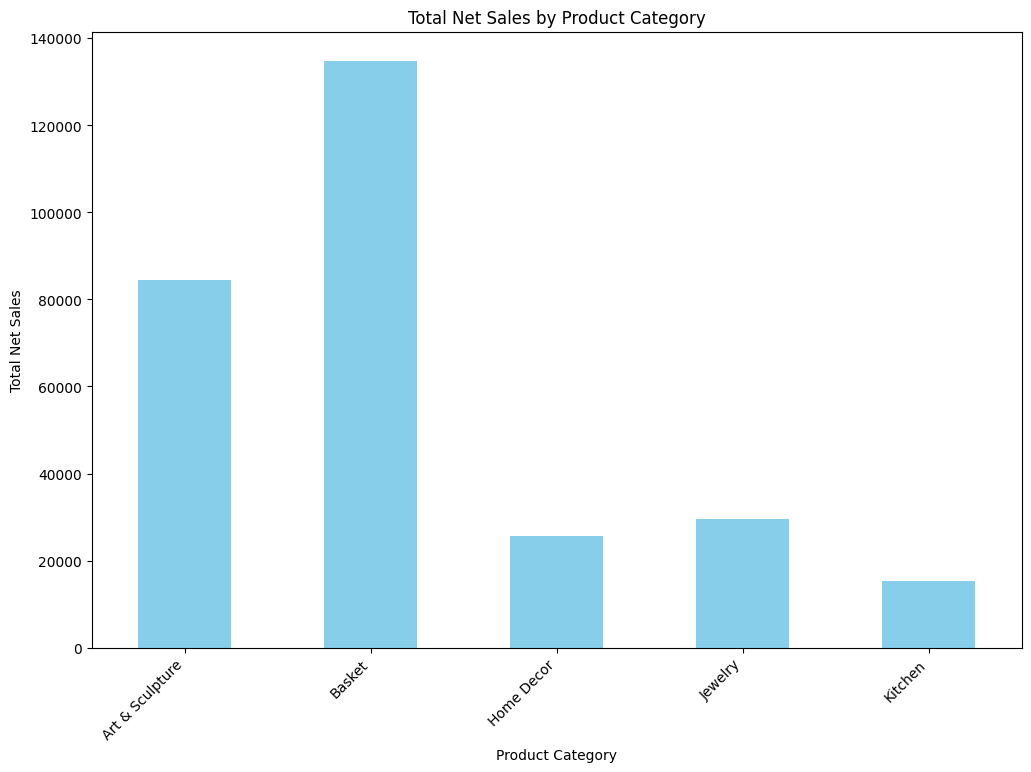

In [ ]:
# Menghitung total penjualan untuk setiap kategori produk
total_sales_by_category = df_bisnis_1.groupby('Product Type')['Total Net Sales'].sum()

# Membuat Bar Chart
plt.figure(figsize=(12, 8))
total_sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Net Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Net Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
basket_data = df_bisnis_1[df_bisnis_1['Product Type'] == 'Basket'].copy()

<Axes: xlabel='Net Quantity', ylabel='Total Net Sales'>

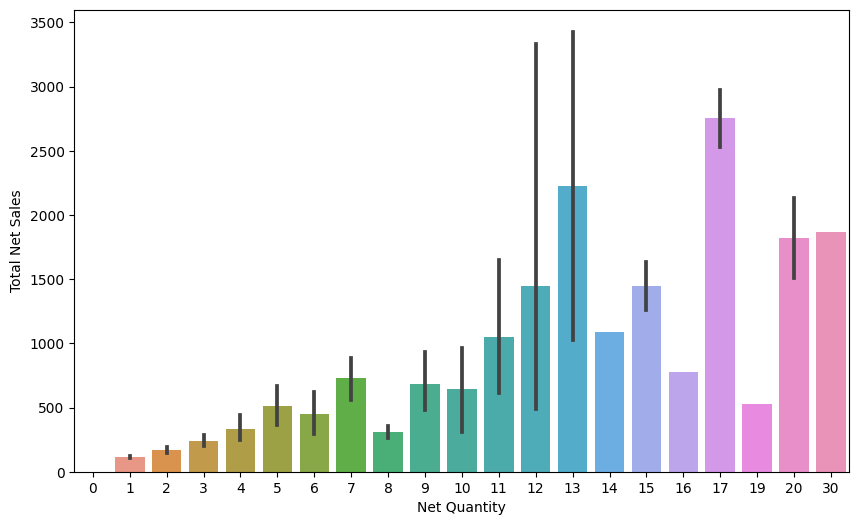

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title


# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=basket_data['Net Quantity']	, y=basket_data['Total Net Sales'])

# Add label for vertical axis


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

def find_optimal_model(features, target, param_grid, cv=5, scoring='neg_mean_absolute_error', random_state=0):
    """
    Mencari model optimal menggunakan GridSearchCV.

    Parameters:
    - features: DataFrame, fitur dari dataset
    - target: Series, label dari dataset
    - param_grid: dict, daftar hyperparameter yang akan diuji
    - cv: int, jumlah fold pada cross-validation
    - scoring: str, metrik evaluasi
    - random_state: int, seed untuk random state

    Returns:
    - best_model: RandomForestRegressor, model terbaik berdasarkan hyperparameter optimal
    """
    # Membuat model RandomForestRegressor
    model = RandomForestRegressor(random_state=random_state)

    # Membuat objek GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)

    # Melatih model dengan data training
    grid_search.fit(features, target)

    # Mendapatkan model terbaik dari hasil grid search
    best_model = grid_search.best_estimator_

    return best_model



In [ ]:

# Contoh penggunaan
features = basket_data[['Net Quantity', 'Gross Sales', 'Discounts', 'Returns']]
target = basket_data['Total Net Sales']

# Pisahkan data menjadi train dan test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Mencari model optimal
best_model = find_optimal_model(features_train, target_train, param_grid)

# Melakukan prediksi pada data test
predictions = best_model.predict(features_test)

# Menghitung Mean Absolute Error pada data test
mae = mean_absolute_error(target_test, predictions)
print(mae)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Pisahkan data menjadi train dan test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Latih model
best_model.fit(features_train, target_train)

# Prediksi pada data uji
predictions = best_model.predict(features_test)

# Evaluasi kinerja menggunakan MAE
mae = mean_absolute_error(target_test, predictions)
print(f'Mean Absolute Error on Test Set: {mae}')
